In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_PATH="/mnt/Archivos/dataset-xray"

In [3]:
from pathlib import Path
from covidframe.tools.load import load_database_from_hdf

In [4]:
base_dir = Path(BASE_PATH)
DEFAULT_DATABASE_NAME_TRAIN = "database_balanced_train.h5"
DEFAULT_DATABASE_NAME_TEST = "database_balanced_test.h5"

In [5]:
df_train = load_database_from_hdf(filename= base_dir / DEFAULT_DATABASE_NAME_TRAIN)

In [6]:
df_train.head()

,image_path,image_name,original_category,id,type,source,folder_name,cv_hash,im_hash,original_image_path,original_image_name,category,size,is_squared,aspect_ratio,resized,new_size
0,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_COVID-2966.png,COVID,COVID-2966,folders-metadata,kaggle,COVID-19_Radiography_Dataset,2525194807696518223,e5c2d8279f7ba482dfc3fab7049fd9290be29f89edad1d...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,COVID-2966.png,covid-19,"(299, 299)",True,1.0,"[[58, 74, 67, 51, 35, 21, 15, 10, 8, 9, 9, 7, ...","(299, 299)"
1,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_Lung_Opacity-2667...,Lung_Opacity,Lung_Opacity-2667,folders-metadata,kaggle,COVID-19_Radiography_Dataset,1085137777431229004,7fb1a436ffccd49f8c21821317dad08899d01f70981ed8...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,Lung_Opacity-2667.png,pneumonia,"(299, 299)",True,1.0,"[[11, 25, 27, 26, 26, 27, 27, 26, 26, 26, 26, ...","(299, 299)"
2,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_Lung_Opacity-5383...,Lung_Opacity,Lung_Opacity-5383,folders-metadata,kaggle,COVID-19_Radiography_Dataset,1082842259636424524,fc2d0e2eea7b55c37a2a9535d4bcc713c1b3b1c21b4068...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,Lung_Opacity-5383.png,pneumonia,"(299, 299)",True,1.0,"[[165, 157, 148, 142, 136, 130, 125, 120, 118,...","(299, 299)"
3,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_COVID-2346.png,COVID,COVID-2346,folders-metadata,kaggle,COVID-19_Radiography_Dataset,2167979743500276055,bfc280a462368db1679ce543ae8bbc7adefce20cc2a0d2...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,COVID-2346.png,covid-19,"(299, 299)",True,1.0,"[[99, 86, 72, 59, 48, 39, 33, 28, 26, 28, 32, ...","(299, 299)"
4,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_COVID-281.png,COVID,COVID-281,folders-metadata,kaggle,COVID-19_Radiography_Dataset,508639633549896718,d5d8833251de76f38f09fc8dd1dcace5bfdf2e13a79a45...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,COVID-281.png,covid-19,"(299, 299)",True,1.0,"[[217, 216, 215, 215, 217, 219, 218, 217, 218,...","(299, 299)"


In [7]:
df_test = load_database_from_hdf(filename= base_dir / DEFAULT_DATABASE_NAME_TEST)

In [8]:
import numpy as np

In [9]:
X = np.stack(df_train["resized"])

In [10]:
X.shape

(9732, 299, 299)

In [11]:
category_mappings = {
    "normal":0,
    "pneumonia":1,
    "covid-19":2
}

In [12]:
y = df_train["category"].map(category_mappings)

In [13]:
y

0       2
1       1
2       1
3       2
4       2
       ..
9727    1
9728    2
9729    2
9730    0
9731    0
Name: category, Length: 9732, dtype: int64

In [14]:
del df_train

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=100)

In [17]:
X_train = X_train.reshape((-1, 299, 299, 1))
X_val = X_val.reshape((-1, 299, 299, 1))

In [18]:
X_train.shape

(7299, 299, 299, 1)

In [ ]:
X_val.shape

## Using TF functions

In [29]:
from covidframe.tools.load import load_database

In [30]:
DEFAULT_DATABASE_NAME_TRAIN = "database_clean_balanced_train.metadata.csv"

In [31]:
df_train = load_database(base_dir / DEFAULT_DATABASE_NAME_TRAIN)

In [33]:
df_train.head()

,image_path,image_name,original_category,id,type,source,folder_name,cv_hash,im_hash,original_image_path,original_image_name,category
0,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_COVID-2966.png,COVID,COVID-2966,folders-metadata,kaggle,COVID-19_Radiography_Dataset,2525194807696518223,e5c2d8279f7ba482dfc3fab7049fd9290be29f89edad1d...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,COVID-2966.png,covid-19
1,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_Lung_Opacity-2667...,Lung_Opacity,Lung_Opacity-2667,folders-metadata,kaggle,COVID-19_Radiography_Dataset,1085137777431229004,7fb1a436ffccd49f8c21821317dad08899d01f70981ed8...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,Lung_Opacity-2667.png,pneumonia
2,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_Lung_Opacity-5383...,Lung_Opacity,Lung_Opacity-5383,folders-metadata,kaggle,COVID-19_Radiography_Dataset,1082842259636424524,fc2d0e2eea7b55c37a2a9535d4bcc713c1b3b1c21b4068...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,Lung_Opacity-5383.png,pneumonia
3,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_COVID-2346.png,COVID,COVID-2346,folders-metadata,kaggle,COVID-19_Radiography_Dataset,2167979743500276055,bfc280a462368db1679ce543ae8bbc7adefce20cc2a0d2...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,COVID-2346.png,covid-19
4,/mnt/Archivos/dataset-xray/database_clean/COVI...,COVID-19_Radiography_Dataset_COVID-281.png,COVID,COVID-281,folders-metadata,kaggle,COVID-19_Radiography_Dataset,508639633549896718,d5d8833251de76f38f09fc8dd1dcace5bfdf2e13a79a45...,/mnt/Archivos/dataset-xray/COVID-19_Radiograph...,COVID-281.png,covid-19


In [34]:
image_paths = df_train["image_path"]

In [39]:
from covidframe.tools.image import load_image, to_equal_aspect_ratio, resize_image

In [85]:
def process_image_file(filename, size):
    image = load_image(filename)
    image = to_equal_aspect_ratio(image)
    return resize_image(image,size)

In [86]:
images = [process_image_file(image, IMG_SIZE) for image in image_paths]

In [35]:
y = df_train["category"].map(category_mappings)

In [87]:
X_train, X_val, y_train, y_val = train_test_split(images, y, test_size=0.25, random_state=100)

In [20]:
IMG_SIZE=(299,299)

In [52]:
#From https://cs230.stanford.edu/blog/datapipeline/
#till now it doesn't work 
#presents an inconsistent dimension between batch and tensor https://github.com/tensorflow/tensorflow/issues/40919
def parse_function(filename, label):
    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    resized_image = tf.image.resize(image,list(IMG_SIZE))
    return resized_image, label

In [88]:
dataset_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset_train = dataset_train.shuffle(len(X_train))
#dataset_train = dataset_train.map(parse_function, num_parallel_calls=4)
dataset_train = dataset_train.batch(batch_size)
dataset_train = dataset_train.prefetch(1)

In [89]:
dataset_val = tf.data.Dataset.from_tensor_slices((X_val, y_val))
dataset_val = dataset_val.shuffle(len(X_val))
#dataset_val = dataset_val.map(parse_function, num_parallel_calls=4)
dataset_val = dataset_val.batch(batch_size)
dataset_val = dataset_val.prefetch(1)

In [59]:
from tensorflow.keras import backend as K
import tensorflow as tf

tf.random.set_seed(0)

In [76]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, ReLU, Flatten, Dense, Rescaling
from tensorflow.keras.optimizers import SGD

def create_model():
    K.clear_session()

    input_layer = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 1))
    rescaling_layer = Rescaling(scale=1 / 127.5, offset=-1)(input_layer)
    convolutional_1 = Conv2D(16, kernel_size=3, padding="same")(rescaling_layer)
    max_pooling_1 = MaxPool2D(2)(convolutional_1)
    relu_1 = ReLU()(max_pooling_1)
    convolutional_2 = Conv2D(32, kernel_size=3, padding="same")(relu_1)
    max_pooling_2 = MaxPool2D(2)(convolutional_2)
    relu_2 = ReLU()(max_pooling_2)
    convolutional_3 = Conv2D(64, kernel_size=3)(relu_2)
    relu_3 = ReLU()(convolutional_3)
    flatten = Flatten()(relu_3)
    dense = Dense(256, activation="relu")(flatten)
    output_layer = Dense(3, activation="softmax")(dense)

    model = Model(inputs=input_layer, outputs=output_layer)

    return model

In [78]:
next(iter(dataset_val))

(<tf.Tensor: shape=(10, 299, 299, 1), dtype=float32, numpy=
 array([[[[0.96470594],
          [0.9607844 ],
          [0.9568628 ],
          ...,
          [0.91372555],
          [0.9058824 ],
          [0.8431373 ]],
 
         [[0.96470594],
          [0.9568628 ],
          [0.95294124],
          ...,
          [0.909804  ],
          [0.90196085],
          [0.83921576]],
 
         [[0.9568628 ],
          [0.9490197 ],
          [0.9450981 ],
          ...,
          [0.91372555],
          [0.9058824 ],
          [0.83921576]],
 
         ...,
 
         [[0.85098046],
          [0.7176471 ],
          [0.62352943],
          ...,
          [0.9607844 ],
          [0.9686275 ],
          [0.8705883 ]],
 
         [[0.89019614],
          [0.78823537],
          [0.69803923],
          ...,
          [0.97647065],
          [0.9803922 ],
          [0.8745099 ]],
 
         [[0.94117653],
          [0.86274517],
          [0.79215693],
          ...,
          [0.9803922 ],
   

In [90]:
lr = 0.001
momentum = 0.9

model = create_model()

In [95]:
model.compile(optimizer=SGD(learning_rate=lr, momentum=momentum), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [91]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 299, 299, 1)]     0         
                                                                 
 rescaling (Rescaling)       (None, 299, 299, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 299, 299, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 re_lu (ReLU)                (None, 149, 149, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 32)      4640      
                                                             

In [92]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "my_model/model"

monitor = "val_accuracy"

mode = "max"

model_checkpoint = ModelCheckpoint(checkpoint_path, monitor=monitor, verbose=1, save_best_only=True, save_weights_only=True, mode=mode)

In [93]:
batch_size

10

In [96]:
epochs = 5

history = model.fit(dataset_train, batch_size=batch_size, epochs=epochs, validation_data=dataset_val, callbacks=[model_checkpoint])

Epoch 1/5
730/730 [==============================] - ETA: 0s - loss: 0.8327 - accuracy: 0.6289
Epoch 00001: val_accuracy improved from -inf to 0.67694, saving model to my_model/model
730/730 [==============================] - 473s 583ms/step - loss: 0.8327 - accuracy: 0.6289 - val_loss: 0.7612 - val_accuracy: 0.6769
Epoch 2/5
730/730 [==============================] - ETA: 0s - loss: 0.6636 - accuracy: 0.7297
Epoch 00002: val_accuracy improved from 0.67694 to 0.74435, saving model to my_model/model
730/730 [==============================] - 374s 511ms/step - loss: 0.6636 - accuracy: 0.7297 - val_loss: 0.6350 - val_accuracy: 0.7443
Epoch 3/5
730/730 [==============================] - ETA: 0s - loss: 0.5506 - accuracy: 0.7838
Epoch 00003: val_accuracy improved from 0.74435 to 0.75956, saving model to my_model/model
730/730 [==============================] - 374s 511ms/step - loss: 0.5506 - accuracy: 0.7838 - val_loss: 0.6001 - val_accuracy: 0.7596
Epoch 4/5
730/730 [=====================

In [97]:
import matplotlib.pyplot as plt

In [98]:
def show_results(log):
  val_loss = log.history['val_loss']
  val_acc = log.history['val_accuracy']
      
  fig, axes = plt.subplots(1, 2, figsize=(14,4))
  ax1, ax2 = axes
  ax1.plot(log.history['loss'], label='train')
  ax1.plot(val_loss, label='test')
  ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
  ax2.plot(log.history['accuracy'], label='train')
  ax2.plot(val_acc, label='test')
  ax2.set_xlabel('epoch'); ax2.set_ylabel('accuracy')
  for ax in axes: ax.legend()

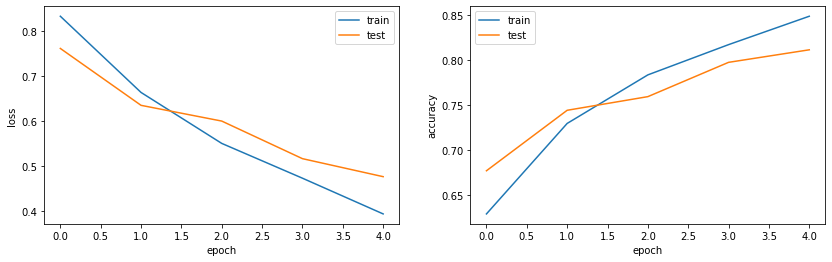

In [99]:
show_results(history)

In [100]:
model = create_model()

model.compile(optimizer=SGD(learning_rate=lr, momentum=momentum), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [101]:
model.load_weights(checkpoint_path)

In [102]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "my_model/model"

monitor = "val_accuracy"

mode = "max"

model_checkpoint = ModelCheckpoint(checkpoint_path, monitor=monitor, verbose=1, save_best_only=True, save_weights_only=True, mode=mode)

In [104]:
epochs = 20

history = model.fit(dataset_train, batch_size=batch_size, epochs=epochs, validation_data=dataset_val, callbacks=[model_checkpoint])

Epoch 1/20
730/730 [==============================] - ETA: 0s - loss: 0.3180 - accuracy: 0.8792
Epoch 00001: val_accuracy improved from -inf to 0.81587, saving model to my_model/model
730/730 [==============================] - 388s 524ms/step - loss: 0.3180 - accuracy: 0.8792 - val_loss: 0.4838 - val_accuracy: 0.8159
Epoch 2/20
730/730 [==============================] - ETA: 0s - loss: 0.2520 - accuracy: 0.9052
Epoch 00002: val_accuracy did not improve from 0.81587
730/730 [==============================] - 414s 558ms/step - loss: 0.2520 - accuracy: 0.9052 - val_loss: 0.5711 - val_accuracy: 0.8048
Epoch 3/20
730/730 [==============================] - ETA: 0s - loss: 0.1862 - accuracy: 0.9293
Epoch 00003: val_accuracy did not improve from 0.81587
730/730 [==============================] - 408s 510ms/step - loss: 0.1862 - accuracy: 0.9293 - val_loss: 0.5381 - val_accuracy: 0.8113
Epoch 4/20
730/730 [==============================] - ETA: 0s - loss: 0.1323 - accuracy: 0.9512
Epoch 00004: 

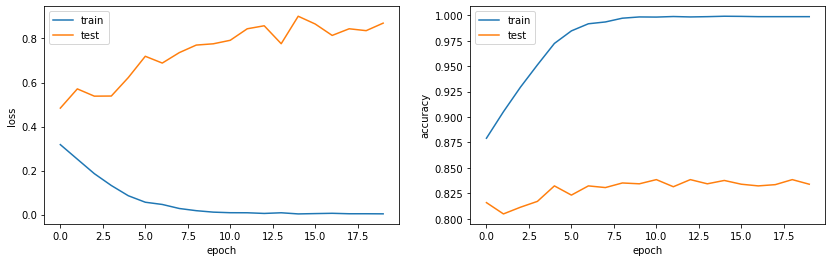

In [105]:
show_results(history)

## Metrics

In [106]:
X_test = np.stack(df_test["resized"])

In [107]:
y_test = df_test["category"].map(category_mappings)

In [108]:
X_test

array([[[ 19,  11,   6, ..., 179, 201, 229],
        [ 10,   3,   1, ..., 135, 165, 214],
        [  8,   2,   0, ..., 103, 135, 190],
        ...,
        [  1,   1,   0, ..., 146, 168, 178],
        [  4,   4,   3, ..., 148, 170, 179],
        [ 10,  10,   9, ..., 150, 172, 179]],

       [[141, 131, 121, ..., 232, 233, 217],
        [ 58,  45,  35, ..., 219, 221, 206],
        [ 13,   8,   5, ..., 205, 210, 195],
        ...,
        [ 28,  36,  43, ...,  65, 118, 148],
        [ 35,  43,  50, ...,  65, 120, 151],
        [ 43,  52,  59, ...,  64, 123, 153]],

       [[ 98,  95,  95, ..., 175, 171, 155],
        [ 99,  97, 100, ..., 173, 170, 160],
        [ 97,  98,  99, ..., 172, 168, 159],
        ...,
        [173, 178, 179, ..., 162, 152, 141],
        [179, 183, 181, ..., 163, 155, 141],
        [184, 185, 185, ..., 159, 148, 140]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   1,   1,   2],
        [  1,   1,   1, ...,   2,   2,   3

In [109]:
y_test

0       0
1       1
2       2
3       2
4       2
       ..
2428    2
2429    0
2430    2
2431    2
2432    1
Name: category, Length: 2433, dtype: int64

In [110]:
y_pred = model.predict(X_test)

In [111]:
y_pred.shape

(2433, 3)

In [112]:
y_pred_classes = np.argmax(y_pred, axis = 1)

In [113]:
y_pred_classes

array([0, 1, 2, ..., 2, 2, 1])

In [114]:
from sklearn.metrics import confusion_matrix

In [115]:
matrix = confusion_matrix(y_test, y_pred_classes)

In [116]:
matrix

array([[663,  92,  56],
       [104, 637,  70],
       [ 31,  37, 743]])

In [117]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

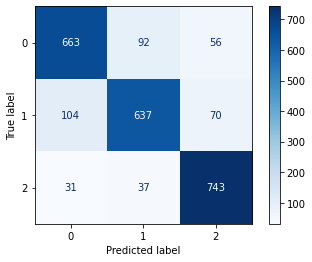

In [119]:
#requires scikit-learn 1.0
#otherwise use plot_confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes, cmap=plt.cm.Blues)

In [120]:
matrix = confusion_matrix(y_test, y_pred_classes)
matrix = matrix.astype('float')
print(matrix)

class_acc = [matrix[i,i]/np.sum(matrix[i,:]) if np.sum(matrix[i,:]) else 0 for i in range(len(matrix))]
class_acc

[[663.  92.  56.]
 [104. 637.  70.]
 [ 31.  37. 743.]]


[0.8175092478421702, 0.7854500616522812, 0.9161528976572133]